In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4b_btms_sizing_sensitivity_c_rate_high_interest'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

print('Loading results from {}'.format(sizing_results_path))
print('result_directory: {}'.format(result_directory))
print('figure_directory: {}'.format(figure_directory))

Loading results from results\advancedScenario7\step4b_btms_sizing_sensitivity_c_rate_high_interest\sizing_results
result_directory: results\advancedScenario7\step4b_btms_sizing_sensitivity_c_rate_high_interest\analysis
figure_directory: results\advancedScenario7\step4b_btms_sizing_sensitivity_c_rate_high_interest\figures


load results 

In [2]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df0 = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df0.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df0)
    sizing_results.append(sizing_results_one_param_combination)

In [3]:
for combination in sizing_results:
    print(combination[0].columns[-1])
#recognize parameters for each result in sizing_results
sizing_results_params = []
for x in sizing_results:
    df0 = x[0]
    a = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][1]
    b_sys = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][2]
    b_cap = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][3]
    b_loan = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][4]
    c = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][5]
    param_dict= {'a': [a], 'b_sys': [b_sys], 'b_cap': [b_cap], 'b_loan':[b_loan], 'c': [c]}
    sizing_results_params.append(pd.DataFrame(param_dict))

param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c


In [4]:
#
df_params = pd.concat(sizing_results_params, axis=0)
df_params.index = df_params['a'] * 365/12
#df_params.sort_index(inplace=True)
df_params.index.argmax()

7

In [5]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [6]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 20.0]


In [7]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df0 in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df0, timestep), index=[df0.name]))
    stats_per_param_combination_list.append(stats)

In [8]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [9]:
stats_per_param_combination.loc[5].describe()['cycles_day']

count    157.000000
mean       1.685062
std        0.913345
min        0.033337
25%        1.109556
50%        1.461893
75%        2.054160
max        4.956730
Name: cycles_day, dtype: float64

In [14]:
stats = stats_per_param_combination.loc[8].describe()
# show only columns in ['share_cost_a', 'share_cost_b_sys', 'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_c']
stats.loc[:, ['share_cost_a', 'share_cost_b_sys', 'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_c']]
# calculate how much larger the other categories are compare to share_cost_b_loan
stats.loc['mean', ['share_cost_a', 'share_cost_b_sys', 'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_c']] / stats.loc['mean', ['share_cost_b_loan']].iloc[0]

share_cost_a         0.674642
share_cost_b_sys     1.141047
share_cost_b_cap     0.722128
share_cost_b_loan    1.000000
share_cost_c         0.562118
Name: mean, dtype: float64

In [15]:
type(stats.loc['mean', ['share_cost_a', 'share_cost_b_sys', 'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_c']] )
#stats.loc['mean', ['share_cost_b_loan']]

pandas.core.series.Series

In [16]:
stats_per_param_combination.loc[0].columns

Index(['btms_size', 'cost_a', 'cost_b_sys', 'cost_b_cap', 'cost_b_loan',
       'cost_b', 'cost_c', 'cost_total', 'share_cost_a', 'share_cost_b_sys',
       'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_b', 'share_cost_c',
       'E_Charge', 'c_rate', 'cycles_day', 'btms_ratio', 'load_factor',
       'btms_peak_to_grid_ratio', 'grid_peak_to_charge_peak_ratio'],
      dtype='object')

Text(0.5, 1.0, 'btms peak to grid ratio for each a value')

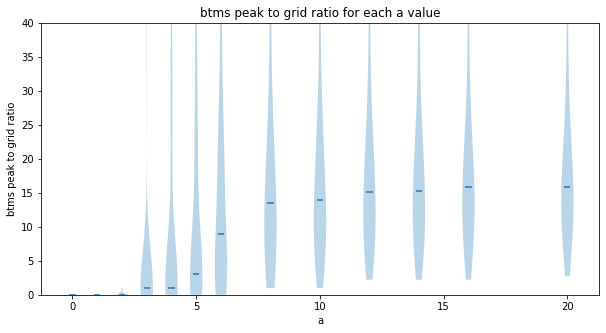

In [17]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(10, 5))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


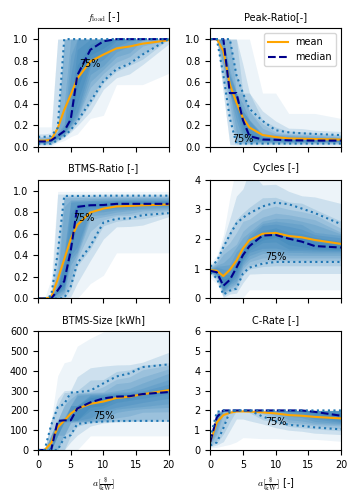

In [49]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(3, 2, figsize=(zoom*plotSizeX, zoom*4.2*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 8
    elif column == 'btms_ratio':
        x = 7
    elif column == 'cost_a':
        x = 10
    elif column == 'grid_peak_to_charge_peak_ratio':
        x = 5
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[2], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[5], 'c_rate', alpha)
plot_mean_median_color_area(ax[0], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
plot_mean_median_color_area(ax[4], 'btms_size', alpha)
plot_mean_median_color_area(ax[1], 'grid_peak_to_charge_peak_ratio', alpha)
           
# ax0
ax[2].set_ylim(0, 1.1)
ax[2].set_title('BTMS-Ratio [-]', fontsize = 7)
# ax1
ax[5].set_ylim(0, 6)
ax[5].set_title('C-Rate [-]', fontsize = 7)
# plot legend with rectangular shape
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[0].set_ylim(0, 1.1)
ax[0].set_title(r'$f_\mathrm{load}$ [-]', fontsize = 7)
ax[1].legend(loc = 'upper right', fontsize = 7)
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles [-]', fontsize = 7)

# ax4
ax[4].set_ylim(0, 600)
ax[4].set_title('BTMS-Size [kWh]', fontsize = 7)
ax[4].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
# ax5
ax[1].set_ylim(0, 1.1)
ax[1].set_title('Peak-Ratio[-]', fontsize = 7)
ax[5].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$ [-]')

fig.tight_layout()

# save plot
fig.savefig(os.path.join(figure_directory, 'step4b_stats_per_a_value.pdf'), dpi=300, bbox_inches='tight')

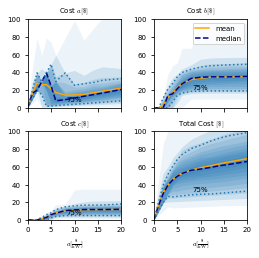

In [50]:
%matplotlib inline
plot_cols = ['cost_a','cost_b', 'cost_c', 'cost_total']
col_titles = [r'Cost $a [\$]$', r'Cost $b [\$]$', r'Cost $c [\$]$', r'Total Cost $[\$]$']
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(2,2, figsize=(zoom*plotSizeX, zoom*2*1.5*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

for i, col in enumerate(plot_cols):
    plot_mean_median_color_area(ax[i], col, alpha)
    ax[i].set_title(col_titles[i], fontsize = 7)

ax[0].set_ylim(0,100)
ax[1].legend(loc = 'upper right', fontsize = 7)
ax[1].set_ylim(0,100)
ax[2].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[2].set_ylim(0,100)
ax[3].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[3].set_ylim(0,100)

fig.tight_layout()
plt.show()

# export to pdf
fig.savefig(os.path.join(figure_directory, 'step4b_costs_per_a.pdf'), dpi=300, bbox_inches='tight')

In [26]:
a_values

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 20.0]

In [24]:
if True:
    # print trajectories for a = 3
    a = 5
    a_idx = np.where(np.array(a_values) == a)[0][0]
    sizing_results_a_choosen = sizing_results[a_idx]

    # plot results
    from tqdm import tqdm
    for df in tqdm(sizing_results_a_choosen):
        pltSettings()
        # use seaborn style
        plt.style.use('seaborn')
        # box around legend
        plt.rcParams['legend.frameon'] = True
        fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
        time_in_h = df['time']/3600
        stats_i = stats_sizing_function(df, timestep)

        btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]

        ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\Theta$')
        ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{Charge}$')
        ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{Grid}$')
        ax[0].set_title('Power usage at ' + df.name)
        ax[0].set_ylabel('Power [kW]')
        ax[0].set_ylim(-1000, 1000)
        # legend outside of plot
        ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
        ax[1].hlines(btms_size, 0, max(time_in_h), label='BTMS-Size', linestyles='dashed')
        ax[1].set_ylabel('Energy [kWh]')
        ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        ax[1].set_xlabel('Time [h]')
        ax[1].set_xlim(0, max(time_in_h))

        # add text box with informations, costs and sizing results
        textstr1 = '\n'.join([
            r'$cost_{a}= \$ %.2f$' % stats_i['cost_a'],
            r'$cost_{b}= \$ %.2f$' % stats_i['cost_b'],
            r'$cost_{c}= \$ %.2f$' % stats_i['cost_c'],
            r'$cost_{total}= \$ %.2f$' % stats_i['cost_total'],])
        textstr2 = '\n'.join([
            r'$BTMS-Size =%.2f$ kWh' % stats_i['btms_size'],
            r'$\max{P_{\Theta}}=%.2f$ kW' % df['P_BTMS'].abs().max(),
            r'$\max{P_{Grid}}=%.2f$ kW' % df['P_Grid'].max(),
            r'C-Rate: %.2f' % stats_i['c_rate'],
            r'Cycles: %.2f' % stats_i['cycles_day'],
            r'BTMS-Ratio: %.2f' % stats_i['btms_ratio'],
            r'Load-Factor(Grid): %.2f' % stats_i['load_factor'],
            r'E_Charge: %.2f' % stats_i['E_Charge'],
            ])
        textstr = '\n'.join([
            textstr1, 
            textstr2])
        
        # add text under legend of first plot
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax[0].text(1.05, 0.10, textstr, transform = ax[0].transAxes, fontsize = 10, bbox=props, va='bottom', ha='left')
        os.makedirs(os.path.join(figure_directory, 'a ' + str(a)), exist_ok=True)
        plt.savefig(os.path.join(figure_directory, 'a ' + str(a), df.name + '_btms_sizing.png'), dpi=300, bbox_inches='tight')
        plt.close()

100%|██████████| 157/157 [04:29<00:00,  1.72s/it]


$\mathrm{cost}_{a}= \$ 49.32$
$\mathrm{cost}_{b}= \$ 17.38$
$\mathrm{cost}_{c}= \$ 3.43$
$\mathrm{cost}_{total}= \$ 70.13$


$\mathrm{BTMS-Size} =68 \mathrm{kWh}$
$\mathrm{E}_\mathrm{Charge} =1266 \mathrm{kWh}$
$\max{P_{\Theta}}=300 \mathrm{kW}$
$\max{P_{Grid}}=300 \mathrm{kW}$


$\mathrm{C-Rate}= 4.44$
$\mathrm{Cycles}= 2.40$
$\mathrm{BTMS-Ratio}= 0.13$
$f_\mathrm{load}= 0.18$
$E_\mathrm{Charge}: 1266.50 \mathrm{kWh}$
$\mathrm{cost}_{a}= \$ 2.77$
$\mathrm{cost}_{b}= \$ 21.13$
$\mathrm{cost}_{c}= \$ 6.88$
$\mathrm{cost}_{total}= \$ 30.78$


$\mathrm{BTMS-Size} =261 \mathrm{kWh}$
$\mathrm{E}_\mathrm{Charge} =347 \mathrm{kWh}$
$\max{P_{\Theta}}=283 \mathrm{kW}$
$\max{P_{Grid}}=17 \mathrm{kW}$


$\mathrm{C-Rate}= 1.09$
$\mathrm{Cycles}= 1.25$
$\mathrm{BTMS-Ratio}= 0.94$
$f_\mathrm{load}= 1.00$
$E_\mathrm{Charge}: 347.17 \mathrm{kWh}$
$\mathrm{cost}_{a}= \$ 49.32$
$\mathrm{cost}_{b}= \$ 0.00$
$\mathrm{cost}_{c}= \$ 0.00$
$\mathrm{cost}_{total}= \$ 49.32$


$\mathrm{BTMS-Size} =0 \mathrm{kW

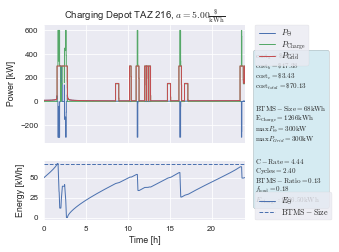

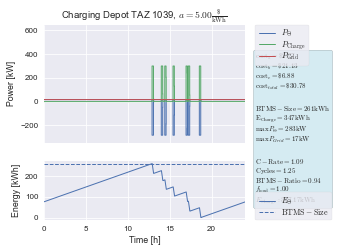

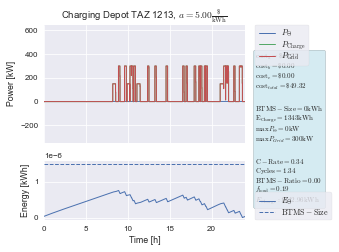

In [23]:
# plot distinct charging station to pdf for paper
a = 5
a_idx = np.where(np.array(a_values) == a)[0][0]
sizing_results_a_choosen = sizing_results[a_idx]
# plot result for paper
for choosen_depot in ['216', '1039', '1213']:
#choosen_depot = '1374'
    for df in sizing_results_a_choosen:
        if df.name == choosen_depot:
            # use seaborn style
            #plt.style.use('seaborn')
            plt.style.use('seaborn-paper')
            pltSettings()
            plt.rcParams["mathtext.fontset"] = "cm"
            plt.rcParams["lines.linewidth"] = 1
            # box around legend
            plt.rcParams['legend.frameon'] = True
            fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
            time_in_h = df['time']/3600
            stats_i = stats_sizing_function(df, timestep)

            btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]

            ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\mathrm{\Theta}$')
            ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{\mathrm{Charge}}$')
            ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{\mathrm{Grid}}$')
            ax[0].set_title(r'Charging Depot TAZ ' + df.name + r', $a = %.2f \frac{\mathrm{\$}}{\mathrm{kWh}}$' % a)
            ax[0].set_ylabel('Power [kW]')
            ax[0].set_ylim(-350, 650)
            # legend outside of plot
            ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=0)
            #ax[0].legend(loc = 'upper left')
            ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
            ax[1].hlines(btms_size, 0, max(time_in_h), label=r'$\mathrm{BTMS-Size}$', linestyles='dashed')
            ax[1].set_ylabel('Energy [kWh]')
            ax[1].legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., labelspacing=0)
            #ax[1].legend(loc = 'upper left')
            ax[1].set_xlabel('Time [h]')
            ax[1].set_xlim(0, max(time_in_h))

            # add text box with informations, costs and sizing results
            textstr1 = '\n'.join([
                r'$\mathrm{cost}_{a}= \$ %.2f$' % stats_i['cost_a'],
                r'$\mathrm{cost}_{b}= \$ %.2f$' % stats_i['cost_b'],
                r'$\mathrm{cost}_{c}= \$ %.2f$' % stats_i['cost_c'],
                r'$\mathrm{cost}_{total}= \$ %.2f$' % stats_i['cost_total'],])
            textstr2 = '\n'.join([
                '\n',
                r'$\mathrm{BTMS-Size} =%.0f \mathrm{kWh}$' % stats_i['btms_size'],
                r'$\mathrm{E}_\mathrm{Charge} =%.0f \mathrm{kWh}$' % stats_i['E_Charge'],
                r'$\max{P_{\Theta}}=%.0f \mathrm{kW}$' % df['P_BTMS'].abs().max(),
                r'$\max{P_{Grid}}=%.0f \mathrm{kW}$' % df['P_Grid'].max(),
                '\n',
                r'$\mathrm{C-Rate}= %.2f$' % stats_i['c_rate'],
                r'$\mathrm{Cycles}= %.2f$' % stats_i['cycles_day'],
                r'$\mathrm{BTMS-Ratio}= %.2f$' % stats_i['btms_ratio'],
                r'$f_\mathrm{load}= %.2f$' % stats_i['load_factor'],
                r'$E_\mathrm{Charge}: %.2f \mathrm{kWh}$' % stats_i['E_Charge'],
                ])
            textstr = '\n'.join([
                textstr1, 
                textstr2])
            print(textstr)
            # reduce spacing between text with latex
            fig.set_size_inches(plotSizeX, 3*plotSizeY)
            # add text under legend of first plot
            props = dict(boxstyle='round', facecolor = 'lightblue', alpha=0.5)
            ax[0].text(1.05, 0.12, textstr, transform = ax[0].transAxes, fontsize = 7, bbox=props, va='center', ha='left', linespacing = 1, math_fontfamily='cm')

            plt.savefig(os.path.join(figure_directory, 'step4_trajectories_taz' + df.name + '_a_' + str(a) + '_btms_sizing.pdf'), dpi=300, bbox_inches='tight')

In [56]:
stats_per_param_combination.loc[5].columns

Index(['btms_size', 'cost_a', 'cost_b_sys', 'cost_b_cap', 'cost_b_loan',
       'cost_b', 'cost_c', 'cost_total', 'share_cost_a', 'share_cost_b_sys',
       'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_b', 'share_cost_c',
       'E_Charge', 'c_rate', 'cycles_day', 'btms_ratio', 'load_factor',
       'btms_peak_to_grid_ratio', 'grid_peak_to_charge_peak_ratio'],
      dtype='object')

In [45]:
for a in a_values:
    a_idx = np.where(np.array(a_values) == a)[0][0]
    print(str(a_idx) + ' - ' + str(a))

0 - 0.0
1 - 1.0
2 - 2.0
3 - 3.0
4 - 4.0
5 - 5.0
6 - 6.0
7 - 8.0
8 - 10.0
9 - 12.0
10 - 14.0
11 - 16.0
12 - 20.0


[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.

KeyError: 7

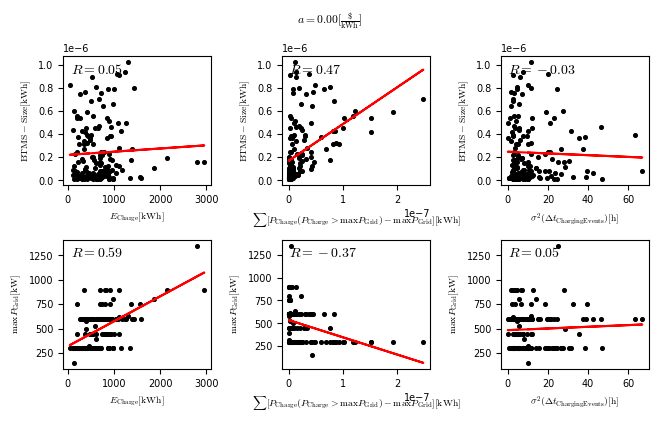

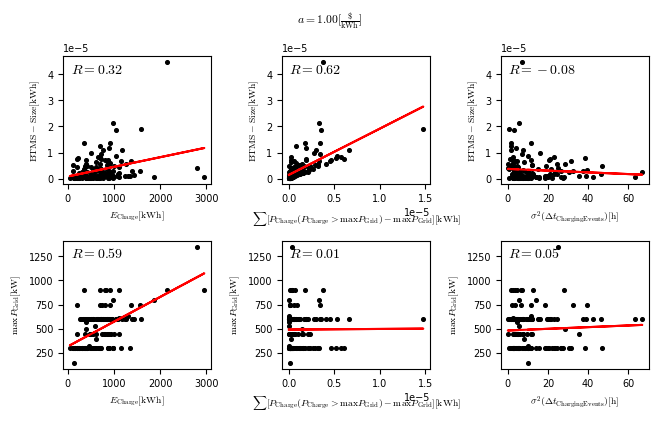

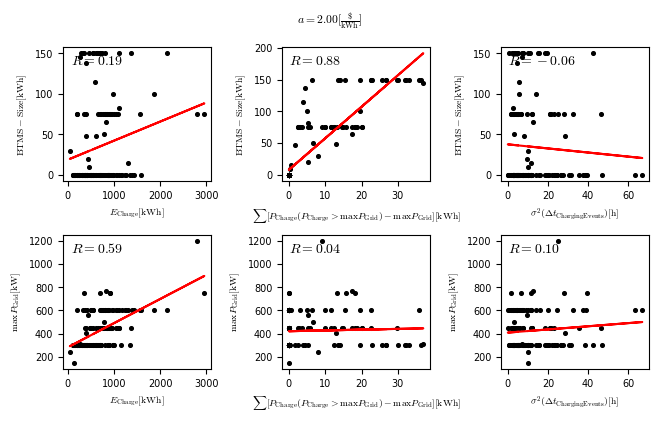

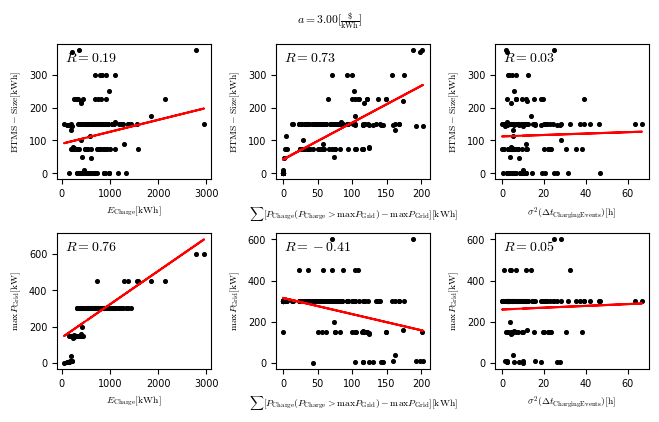

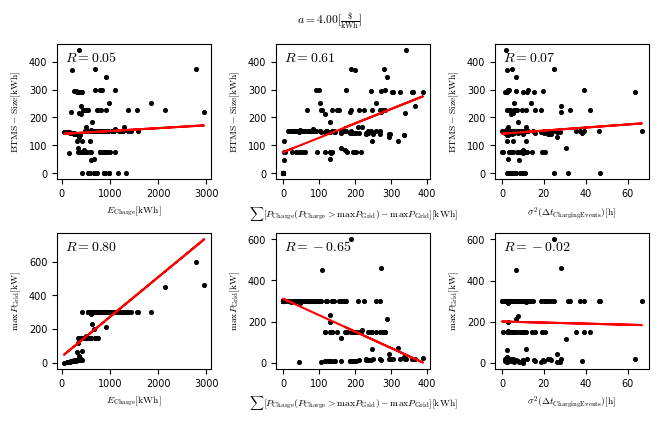

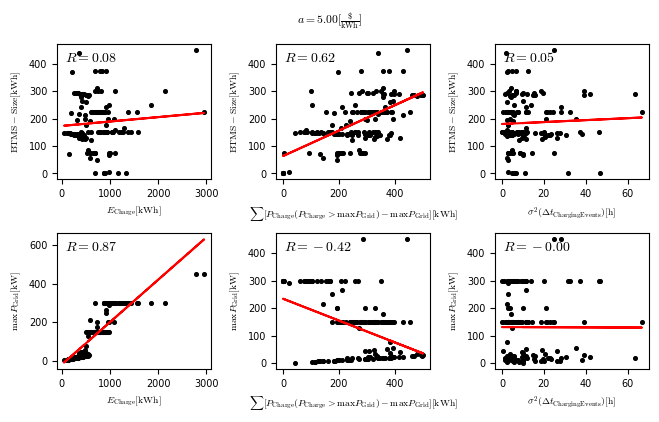

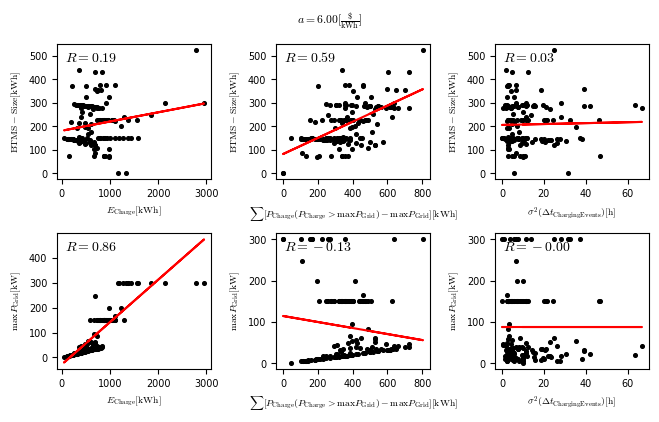

In [48]:
from scipy import stats as st
# examine the dependency of E_Charge, P_Charge_max, sigma(delta_t) on the storage_size, peak_ratio and P_Grid_max
# choose a value for a
a = 5
r_values_over_a = pd.DataFrame()
for a in a_values:
# plot results
    plt.style.use('default')
    pltSettings()

    a_idx = np.where(np.array(a_values) == a)[0][0]

    '''x values'''
    # get P_Charge_max
    P_Charge_max = {}
    P_Charge_mean = {}
    E_Charge_over_mean = {}
    for df in sizing_results[a_idx]:
        P_Charge_max[df.name] = df['P_Charge'].abs().max()
        P_Charge_mean[df.name] = df['P_Charge'][df['P_Charge']>0].abs().mean()
        _x = df['P_Charge'][df['P_Charge']>P_Charge_mean[df.name]] - P_Charge_mean[df.name]
        #_x = _x[_x]
        E_Charge_over_mean[df.name] = _x.sum()*60/3600
    P_Charge_max = pd.Series(P_Charge_max)
    P_Charge_mean = pd.Series(P_Charge_mean)
    P_Charge_max.sort_index(inplace=True)
    P_Charge_mean.sort_index(inplace=True)
    P_Charge_max.name = 'P_Charge_max'
    P_Charge_mean.name = 'P_Charge_mean'

    P_Charge_max_to_mean = (P_Charge_max-P_Charge_mean)
    P_Charge_max_to_mean.name = 'P_Charge_max/P_Charge_mean'
    E_Charge_over_mean = pd.Series(E_Charge_over_mean)
    E_Charge_over_mean.name = 'E_Charge_over_mean'

    P_Charge_max_to_E_Charge = (P_Charge_max/stats_per_param_combination.loc[a_idx]['E_Charge'])
    P_Charge_max_to_E_Charge.name = 'P_Charge_max/E_Charge'

    # get sigma(delta_t)
    # load frequency analysis
    frequency_analysis = pd.read_csv(os.path.join(result_parent_directory,'step0_data_preparation_and_analysis', 'frequency_analysis.csv'), index_col=0)
    frequency_analysis.head()
    frequency_analysis.set_index('taz', inplace=True)
    # remove tazs with no data
    idx = frequency_analysis['time_since_last_event'] != '[0]'
    frequency_analysis = frequency_analysis[idx]
    frequency_analysis.sort_index(inplace=True)
    sigma_delta_t = frequency_analysis['sigma']
    sigma_delta_t = sigma_delta_t/3600
    sigma_delta_t = sigma_delta_t**2
    sigma_delta_t.name = r'$\sigma^2(\Delta t_\mathrm{Charging Events}) \mathrm{[h]}$'

    '''y values'''
    # get P_Grid_max
    P_Grid_max = {}
    for df in sizing_results[a_idx]:
        P_Grid_max[df.name] = df['P_Grid'].max()
    P_Grid_max = pd.Series(P_Grid_max)
    P_Grid_max.sort_index(inplace=True)
    P_Grid_max.name = r'$\max P_\mathrm{Grid} \mathrm{[kW]}$'

    btms_to_E_Charge = stats_per_param_combination.loc[a_idx]['btms_size']/stats_per_param_combination.loc[a_idx]['E_Charge']
    btms_to_E_Charge.name = 'btms_size/E_Charge'

    E_Charged_P_Charge_greater_P_Grid_max_mean = {}
    for df in sizing_results[a_idx]:
        _res = df[df['P_Charge']>df['P_Grid'].max()]['P_Charge'] - df['P_Grid'].max()
        _res = _res.sum() * 60/3600
        E_Charged_P_Charge_greater_P_Grid_max_mean[df.name] = _res
    E_Charged_P_Charge_greater_P_Grid_max_mean = pd.Series(E_Charged_P_Charge_greater_P_Grid_max_mean)
    E_Charged_P_Charge_greater_P_Grid_max_mean.sort_index(inplace=True)
    E_Charged_P_Charge_greater_P_Grid_max_mean.name = r'$\sum [P_\mathrm{Charge}(P_\mathrm{Charge}>\max P_\mathrm{Grid}) - \max P_\mathrm{Grid}] \mathrm{[kWh]}$'

    E_Charge = stats_per_param_combination.loc[a_idx]['E_Charge']
    E_Charge.name = r'$E_\mathrm{Charge} \mathrm{[kWh]}$'
    x = [E_Charge, E_Charged_P_Charge_greater_P_Grid_max_mean, sigma_delta_t]
    print([type(z) for z in x])
    btms_size = stats_per_param_combination.loc[a_idx]['btms_size']
    btms_size.name = r'$\mathrm{BTMS-Size} \mathrm{[kWh]}$'
    #y = [btms_size,stats_per_param_combination.loc[a_idx]['grid_peak_to_charge_peak_ratio'] ,P_Grid_max,]
    y = [btms_size, P_Grid_max,]
    print([type(z) for z in y])

    # plot
    fig, ax = plt.subplots(len(y), len(x), figsize=(plotSizeX2col, len(y)* 0.78* plotSizeY2col))


    for x_i in range(len(x)):
        for y_i in range(len(y)):
            ax[y_i, x_i].scatter(x[x_i], y[y_i], marker='o', color='k', s = 7)
            ax[y_i, x_i].set_xlabel(x[x_i].name)
            ax[y_i, x_i].set_ylabel(y[y_i].name)
            # add trendline
            slope, intercept, r_value, p_value, std_err = st.linregress(x[x_i], y[y_i])
            ax[y_i, x_i].plot(x[x_i], intercept + slope*x[x_i], 'r', label='fitted line')
            # add r_value
            ax[y_i, x_i].text(0.05, 0.95, r'$R=%.2f$' % r_value, transform = ax[y_i, x_i].transAxes, fontsize = 10, va='top', ha='left')
            # add r_value to dict
            r_values_over_a = r_values_over_a.append({'a':a, 'x':x[x_i].name, 'y':y[y_i].name, 'r_value':r_value}, ignore_index=True)

    # add title
    fig.suptitle(r'$a=%.2f [\frac{\mathrm{\$}}{\mathrm{kWh}}]$' % a)

    plt.tight_layout()

    plt.savefig(os.path.join(figure_directory, 'step4_dependency_analysis_a_'+str(a)+'.pdf'), dpi=300)
    plt.savefig(os.path.join(figure_directory, 'step4_dependency_analysis_a_'+str(a)+'.png'), dpi=300)

In [125]:
P_Grid_max.name

'$\\max P_\\mathrm{Grid} \\mathrm{[kW]}$'

In [ ]:
r_values_over_a.set_index(['a', 'x', 'y'], inplace=True)

In [130]:
r_values_over_a.head(4)

r_value
a   x                                                  y                                             
0.0 $E_\mathrm{Charge} \mathrm{[kWh]}$                 $\mathrm{BTMS-Size} \mathrm{[kWh]}$   0.191724
                                                       $\max P_\mathrm{Grid} \mathrm{[kW]}$  0.585456
    $\sum [P_\mathrm{Charge}(P_\mathrm{Charge}>\max... $\mathrm{BTMS-Size} \mathrm{[kWh]}$   0.417429
                                                       $\max P_\mathrm{Grid} \mathrm{[kW]}$ -0.359605